# Finding Zeros with Newton algo, with analytic, central differences and sympy.symbols derivatives

In [2]:
import numpy as np
import scipy
import scipy.optimize
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# f(x) ---------------------------------------
def f(x):   
    y = x + 2*scipy.cos(x)
    return y

-1.02986652932
-1.0298665293222757


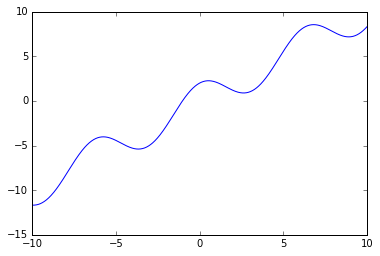

In [4]:
# starting interval [-2, 2]
print (scipy.optimize.bisect(f, -2, 2) )

#Newton Raphson method with starting point at x0 = 2. 
print (scipy.optimize.newton(f,  2)  ) 

xvals = np.linspace(-10, 10,1000)
yvals = [f(x) for x in xvals]
plt.plot(xvals,yvals)
plt.show()

In [5]:
def f2(x):   
    y = x*scipy.cos(x**3 -5)
    return y

# Numerical derivative - central difference approximation
def df2(x):   
    deltax = 0.001
    return (f2(x+deltax) - f2(x-deltax))/(2.0*deltax)

# scipy derivative   
from scipy.misc import derivative
def ddf2(x):   
    return derivative(f2, x, dx=1e-6)

# Analytic derivative
# To calculate it use Symbol from sympy
# from sympy import *
# xx = Symbol('xx')
# print diff(xx*cos(xx**3 -5), xx, 1)
# this is the output of print
def dddf2(x):   
    y = -3*x**3*scipy.sin(x**3 - 5) + scipy.cos(x**3 - 5)
    return y

 the f2(x)derivatives: 1 - analytic, 2 - central differences and 3 - sympy.symbols derivatives 
-4.376578700170941
-4.376872690170508
-4.376872690037258
 ----------------------------------- 


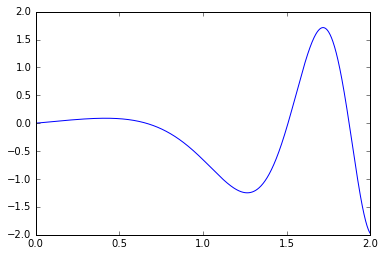

In [7]:
print " the f2(x)derivatives: 1 - analytic, 2 - central differences and 3 - sympy.symbols derivatives "
print( df2(2))
print (ddf2(2))
print (dddf2(2))

xvals = np.linspace(0, 2,1000)
yvals = [f2(x) for x in xvals]
plt.plot(xvals,yvals)
plt.show()

In [12]:
# Newton Raphson method with starting point at x0 = 0.5 
val = scipy.optimize.newton(f2,  0.5)
# Remember, this is - finding a zero! 
# At the zero, that is the point x where f(x) = 0, the df(x)/x must NOT necessarely = 0! 
print (val)
print (f2(val))
print (df2(val))
print (ddf2(val))
print (dddf2(val))

print (scipy.optimize.bisect(f2, 0.5, 1) )
print (scipy.optimize.newton(f2, 0.5))
print (scipy.optimize.newton(f2, 0.5, fprime=df2))

0.660088004499495
4.650197214194901e-16
-0.8628354534827144
-0.8628330587993871
-0.8628330588459283
0.6600880045
0.660088004499495
0.6600880044994953


In [13]:
from scipy import optimize
# ---------------------------------------------
# this is the fastest. So maybe we do NOT need to calculate and pass the derivative
%timeit optimize.newton(f2,  0.5) 
# ---------------------------------------------
%timeit optimize.bisect(f2, 0.5, 1) 
%timeit optimize.newton(f2, 0.5, fprime=df2)
%timeit optimize.newton(f2, 0.5, fprime=ddf2)
%timeit optimize.newton(f2, 0.5, fprime=dddf2)

10000 loops, best of 3: 29.1 µs per loop
10000 loops, best of 3: 48.8 µs per loop
10000 loops, best of 3: 53 µs per loop
10000 loops, best of 3: 140 µs per loop
10000 loops, best of 3: 50.1 µs per loop
